In [1]:
import pandas as pd
import os

In [3]:
product_info_file_path = '/Users/iramkamdar/Desktop/SKINCARE_MODEL/product_info.csv'
reviews_folder_path = '/Users/iramkamdar/Desktop/SKINCARE_MODEL/reviews'
merge_folder_path = '/Users/iramkamdar/Desktop/SKINCARE_MODEL/merged'

# Load the product info data
product_info_df = pd.read_csv(product_info_file_path)
# Dropping columns not relevant to our model
product_info_df.drop(['size', 'variation_type', 'variation_value','variation_desc', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'child_count','child_max_price', 'child_min_price'], axis=1, inplace=True)
product_info_df.rename(columns={'rating': 'overall_rating'}, inplace=True)

if not os.path.exists(merge_folder_path):
    os.makedirs(merge_folder_path)

for filename in os.listdir(reviews_folder_path):
    if filename.endswith('.csv'):
        review_file_path = os.path.join(reviews_folder_path, filename)
        reviews_df = pd.read_csv(review_file_path)
        reviews_df.drop(reviews_df.columns[0], axis=1, inplace=True)
        reviews_df.drop(['submission_time', 'brand_name', 'price_usd'], axis=1, inplace=True)
        merged_df = pd.merge(product_info_df, reviews_df, on=['product_id', 'product_name'], how='inner')
        file_name_new = merge_folder_path + "/merged_" + filename + ".csv"
        merged_df.to_csv(file_name_new, index=False)
        print(f"Writing to {file_name_new}, shape: {merged_df.shape}")

/var/folders/qz/d_bbgpmn6cb3v7k9_1nqm_b00000gn/T/ipykernel_44124/2923354645.py:17: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv(review_file_path)


Writing to /Users/iramkamdar/Desktop/SKINCARE_MODEL/merged/merged_reviews_0-250.csv.csv, shape: (602130, 26)


/var/folders/qz/d_bbgpmn6cb3v7k9_1nqm_b00000gn/T/ipykernel_44124/2923354645.py:17: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv(review_file_path)


Writing to /Users/iramkamdar/Desktop/SKINCARE_MODEL/merged/merged_reviews_1250-end.csv.csv, shape: (49977, 26)


/var/folders/qz/d_bbgpmn6cb3v7k9_1nqm_b00000gn/T/ipykernel_44124/2923354645.py:17: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv(review_file_path)


Writing to /Users/iramkamdar/Desktop/SKINCARE_MODEL/merged/merged_reviews_750-1250.csv.csv, shape: (119317, 26)
Writing to /Users/iramkamdar/Desktop/SKINCARE_MODEL/merged/merged_reviews_250-500.csv.csv, shape: (206725, 26)
Writing to /Users/iramkamdar/Desktop/SKINCARE_MODEL/merged/merged_reviews_500-750.csv.csv, shape: (116262, 26)


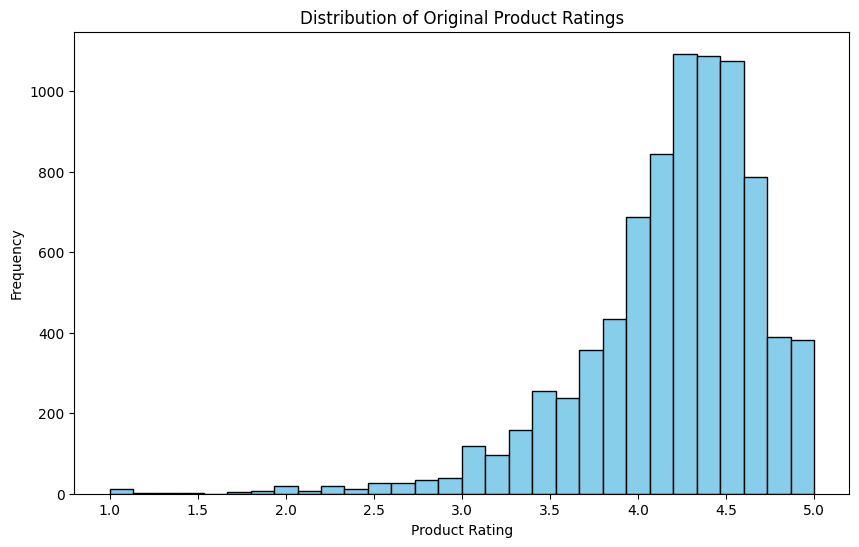

In [4]:
import matplotlib.pyplot as plt

# Re-plotting the histogram using the original, unscaled ratings
# Assuming 'rating' column in processed_data represents the original rating values

plt.figure(figsize=(10, 6))
plt.hist(product_info_df['overall_rating'], bins=30, edgecolor='black', color='skyblue')
plt.title("Distribution of Original Product Ratings")
plt.xlabel("Product Rating")
plt.ylabel("Frequency")
plt.show()